In [2]:
import urllib.request
import json
import time
import random
import numpy as np
import pandas as pd
import requests
import os
import xlrd
import jieba
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imageio import imread
import re

In [8]:
def data_process1(file = None):
    data0 = pd.read_excel(r'城乡建设.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=2009
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv(r'stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [17]:
def CXJS():
    word_fre = {}
    adata, data_after_stop, labels = data_process1()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD1 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL1 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL1 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS1 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Urban and Rural Construction Classification', fontweight='heavy', color='blue')
    #PIC1 = plt.show()
    AUC1 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD1, ZHL1, ZQL1, FS1, AUC1

In [28]:
JD1, ZHL1, ZQL1, FS1, AUC1 = CXJS()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [29]:
print(JD1)
print(ZHL1)
print(ZQL1)
print(FS1)
print(AUC1)

0.7823383084577115
0.8295739348370927
0.7557077625570776
0.7909199522102748
0.7826882019864476


In [9]:
word_fre = {}
adata, data_after_stop, labels = data_process1()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


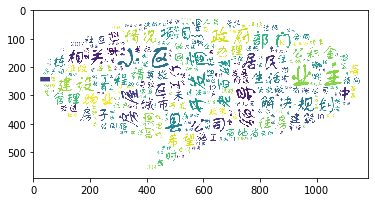

In [10]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc1 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc1.fit_words(word_fre)
plt.imshow(wc1)
plt.savefig('1.svg',dpi=600)

In [33]:
def data_process2(file = None):
    data0 = pd.read_excel('劳动和社会保障.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=1969
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [34]:
def LDHSHBZ():
    word_fre = {}
    adata, data_after_stop, labels = data_process2()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD2 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL2 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL2 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS2 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Labor and Social Security Classification', fontweight='heavy', color='blue')
    #PIC2 = plt.show()
    AUC2 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD2, ZHL2, ZQL2, FS2, AUC2

In [51]:
JD2, ZHL2, ZQL2, FS2, AUC2 = LDHSHBZ()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [52]:
print(JD2)
print(ZHL2)
print(ZQL2)
print(FS2)
print(AUC2)

0.8401015228426396
0.8897435897435897
0.8069767441860465
0.8463414634146341
0.8406004380878753


In [87]:
word_fre = {}
adata, data_after_stop, labels = data_process2()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


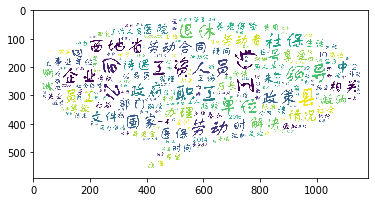

In [88]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc2 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc2.fit_words(word_fre)
plt.imshow(wc2)

In [55]:
def data_process3(file = None):
    data0 = pd.read_excel('教育文体.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=1589
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [58]:
def JYWT():
    word_fre = {}
    adata, data_after_stop, labels = data_process3()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD3 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL3 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL3 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS3 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Educational Style Classification', fontweight='heavy', color='blue')
    #PIC3 = plt.show()
    AUC3 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD3, ZHL3, ZQL3, FS3, AUC3

In [77]:
JD3, ZHL3, ZQL3, FS3, AUC3 = JYWT()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [78]:
print(JD3)
print(ZHL3)
print(ZQL3)
print(FS3)
print(AUC3)

0.8301886792452831
0.7823529411764706
0.8866666666666667
0.83125
0.8337440381558028


In [89]:
word_fre = {}
adata, data_after_stop, labels = data_process3()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


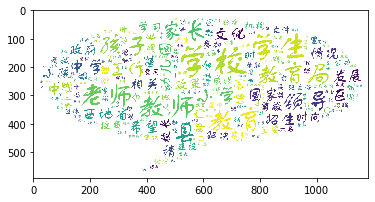

In [90]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc3 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc3.fit_words(word_fre)
plt.imshow(wc3)

In [91]:
def data_process4(file = None):
    data0 = pd.read_excel('商贸旅游.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=1215
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [92]:
def SMLY():
    word_fre = {}
    adata, data_after_stop, labels = data_process4()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD4 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL4 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL4 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS4 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Business Tourism Classification', fontweight='heavy', color='blue')
    #PIC4 = plt.show()
    AUC4 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD4, ZHL4, ZQL4, FS4, AUC4

In [109]:
JD4, ZHL4, ZQL4, FS4, AUC4 = SMLY()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [110]:
print(JD4)
print(ZHL4)
print(ZQL4)
print(FS4)
print(AUC4)

0.8251028806584362
0.8596491228070176
0.7871485943775101
0.8218029350104822
0.8271113831089352


In [111]:
word_fre = {}
adata, data_after_stop, labels = data_process4()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


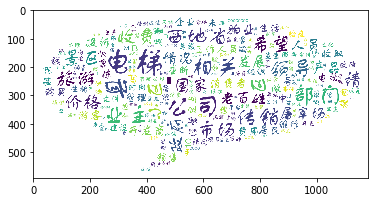

In [112]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc4 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc4.fit_words(word_fre)
plt.imshow(wc4)

In [113]:
def data_process5(file = None):
    data0 = pd.read_excel('环境保护.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=938
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [114]:
def HJBH():
    word_fre = {}
    adata, data_after_stop, labels = data_process5()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD5 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL5 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL5 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS5 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Environmental Protection Classification', fontweight='heavy', color='blue')
    #PIC5 = plt.show()
    AUC5 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD5, ZHL5, ZQL5, FS5, AUC5

In [131]:
JD5, ZHL5, ZQL5, FS5, AUC5 = HJBH()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [132]:
print(JD5)
print(ZHL5)
print(ZQL5)
print(FS5)
print(AUC5)

0.9042553191489362
0.8723404255319149
0.9318181818181818
0.9010989010989012
0.9042553191489362


In [133]:
word_fre = {}
adata, data_after_stop, labels = data_process5()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


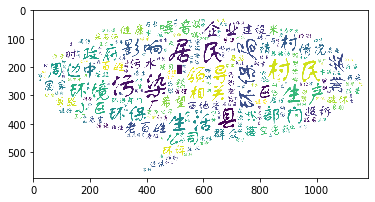

In [134]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc5 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc5.fit_words(word_fre)
plt.imshow(wc5)

In [135]:
def data_process6(file = None):
    data0 = pd.read_excel('卫生计生.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=877
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [136]:
def WSJS():
    word_fre = {}
    adata, data_after_stop, labels = data_process6()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD6 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL6 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL6 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS6 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Health and Family Planning Classification', fontweight='heavy', color='blue')
    #PIC6 = plt.show()
    AUC6 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD6, ZHL6, ZQL6, FS6, AUC6

In [156]:
JD6, ZHL6, ZQL6, FS6, AUC6 = WSJS()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [157]:
print(JD6)
print(ZHL6)
print(ZQL6)
print(FS6)
print(AUC6)

0.8774928774928775
0.9135135135135135
0.8622448979591837
0.8871391076115485
0.8754314555519375


In [158]:
word_fre = {}
adata, data_after_stop, labels = data_process6()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


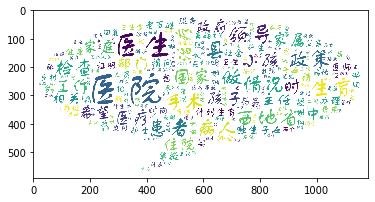

In [159]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc6 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc6.fit_words(word_fre)
plt.imshow(wc6)

In [160]:
def data_process7(file = None):
    data0 = pd.read_excel('交通运输.xlsx',header = None,index_col = 0)
    data0.columns = ['','','','messages','','label']
    n=613
    a = data0[data0['label'] == 1].sample(n)
    b = data0[data0['label'] == 0].sample(n)
    data_new = pd.concat([a,b],axis = 0)
    data_m = data_new['messages']
    data_dup = data_m.drop_duplicates()
    data_qumin = data_m.apply(lambda x: re.sub('x',' ',x))
    data_qumin = data_m.apply(lambda x: re.sub('\n','',x))
    data_qumin = data_m.apply(lambda x: re.sub('\t','',x))
    data_cut = data_qumin.apply(lambda x:jieba.lcut(x))
    stop_patn = pd.read_csv('stoplist.txt',encoding='utf-8',sep = 'hahaha',header = None)
    stop_patn = ['\n','我','在','月','日','1','2','3','4','5','6','7','8','9','　','[0-9a-zA-Z]',' ',' 　','  ','     ','你好','您好','  ']+list(stop_patn.iloc[:,0])
    data_after_stop = data_cut.apply(lambda x:[i for i in x if i not in stop_patn])
    labels = data_new.loc[data_after_stop.index,'label']
    adata = data_after_stop.apply(lambda x:' '.join(x))
    
    return adata, data_after_stop, labels

In [163]:
def JTYS():
    word_fre = {}
    adata, data_after_stop, labels = data_process7()
    from sklearn.model_selection import train_test_split
    from sklearn.naive_bayes import GaussianNB
    from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
    data_tr, data_te, labels_tr, labels_te = train_test_split(adata, labels, test_size = 0.2)
    countVectorizer = CountVectorizer() 
    data_tr = countVectorizer.fit_transform(data_tr)
    data_tr.toarray()
    X_tr = TfidfTransformer().fit_transform(data_tr.toarray()).toarray()
    data_te = CountVectorizer(vocabulary=countVectorizer.vocabulary_).fit_transform(data_te)
    X_te = TfidfTransformer().fit_transform(data_te.toarray()).toarray()
    model = GaussianNB().fit(X_tr,labels_tr.astype('int'))
    y_pre = model.predict(X_te)
    JD7 = model.score(X_te,labels_te.astype('int'))#精度
    from sklearn.metrics import recall_score, precision_score, f1_score, roc_curve, roc_auc_score
    ZHL7 = recall_score(labels_te.astype('int'),y_pre)#召回率
    ZQL7 = precision_score(labels_te.astype('int'),y_pre)#准确率
    FS7 = f1_score(labels_te.astype('int'),y_pre)#f-score
    fpr, tpr, thresholds = roc_curve(labels_te.astype('int'),y_pre)
    #plt.plot(fpr, tpr)
    #plt.title('ROC Curve of Transportation Classification', fontweight='heavy', color='blue')
    #PIC7 = plt.show()
    AUC7 = roc_auc_score(labels_te.astype('int'),y_pre)#AUC指数
    return JD7, ZHL7, ZQL7, FS7, AUC7

In [180]:
JD7, ZHL7, ZQL7, FS7, AUC7 = JTYS()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [181]:
print(JD7)
print(ZHL7)
print(ZQL7)
print(FS7)
print(AUC7)

0.8373983739837398
0.8416666666666667
0.8278688524590164
0.8347107438016529
0.8375


In [182]:
word_fre = {}
adata, data_after_stop, labels = data_process7()

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:14: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


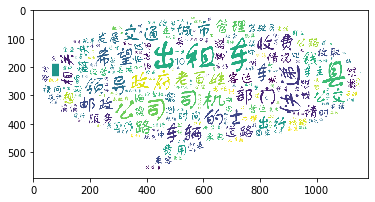

In [183]:
mask = plt.imread('duihuakuan.jpg')
for i in data_after_stop[labels == 0]:
    for j in i:
        if j not in word_fre.keys():
            word_fre[j] = 1
        else:
            word_fre[j] += 1
wc7 = WordCloud(mask = mask,background_color = 'white',font_path='C:\Windows\Fonts\FZSTK')
wc7.fit_words(word_fre)
plt.imshow(wc7)

In [33]:
average = (FS1+FS2+FS3+FS4+FS5+FS6+FS7) / 7

In [34]:
average

0.8625455607512466

In [35]:
PIC1PIC1